<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/Classification-CardioVascular-Risk-Pridiction/blob/main/PERSONAL_NOTEBOOK_%7C_CP_3_%7C_CARDIOVASCULAR_RISK_PREDICTION_%7C_SAMARJEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE 3 CLASSIFICATION - CARDIOVASCULAR RISK PREDICTION - Personal Colab** 
we have been provided with a study dataset of residents of a tow, and we have to predict from there medical conditions and habits, if there is any risk of Cardiovascular disease or problems.


# **PROBLEM STATEMENT**




*   The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
*   The dataset provides the patients’ information. It includes over 3390 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factor
*   The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).









# **UNDERSTANDING THE PROBLEM IN BUSINESS CONTEXT**



From a business context, this machine learning classification project has the potential to be incredibly valuable. Cardiovascular disease is a leading cause of death and disability worldwide, and predicting a patient's risk of developing this disease could help healthcare providers and insurers to make more informed decisions about patient care and treatment. By accurately identifying patients who are at high risk of developing coronary heart disease, healthcare providers can proactively intervene with preventative measures such as lifestyle changes, medication, or closer monitoring. This can lead to better patient outcomes and potentially reduce healthcare costs associated with heart disease treatment. Additionally, insurance companies can use this information to price policies more accurately based on individual risk factors. Overall, this classification project has the potential to improve patient care and outcomes while also benefiting healthcare providers and insurers.

# **GITHUB LINK**


# <b>DATA UNDERSTANDING</b>



Our Data set has 3390 obervasations and , 17 columns/features.

### <b>Demographic:</b>

id	age	education	sex	is_smoking	cigsPerDay	BPMeds	prevalentStroke	prevalentHyp	diabetes	totChol	sysBP	diaBP	BMI	heartRate	glucose	TenYearCHD

*   **id**: Unique id of the person
*   **Sex**: male or female("M" or "F")
*   **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
*   **education**: Education qualification of the person

### <b>Behavioral:</b>
  
*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
  
*   **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>

*   **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
   
*   **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
  
*   **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
  
*   **diabetes**: whether or not the patient had diabetes (Nominal) 

### <b>Medical(current):</b>

*   **totChol**: total cholesterol level (Continuous)
   
*   **sysBP**: systolic blood pressure (Continuous)
   
*   **diaBP**: diastolic blood pressure (Continuous)
   
*   **BMI**: Body Mass Index (Continuous)
   
*   **heartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
   
*   **Glucose**: glucose level (Continuous)

### <b>Predict variable (desired target):</b>

*   **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **DATASET LOADING AND OVERVIEW**

## Importing Libraries and Modules.

In [330]:
import pandas as pd

import numpy as np
from numpy import math

import random

from sklearn.metrics import f1_score

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

!pip install matplotlib --upgrade

import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures, LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, cross_validate

from sklearn.feature_selection import chi2

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error,  roc_auc_score, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, recall_score , precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

from sklearn import tree, ensemble

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('matplotlib: {}'.format(matplotlib.__version__))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
matplotlib: 3.7.0


## Dataset Loading

In [183]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1jv8AyntOWWJDWyEv1TtsCYLXAmCYZf9N/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [184]:
# Creating a copy, for working on it without harming the orignal dataset.
cvd_df = df.copy()


## Data Overview

In [185]:
# checking top 5 Rows or instances.
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [186]:
# checking last 5 Rows or instances.
cvd_df.tail()      

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [187]:
# checking total rows and columns ( Rows, Columns).
cvd_df.shape

(3390, 17)

Some insights:-
1.  We have 8760 instances and 14 features.

In [188]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Some insights:-
1. We do not have any null values present in any column
2. We have 4 columns which have object data type. others are either float64 or int64.

In [189]:
# checking description of all data types columns.
cvd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [190]:
# Checking for unique values in each column
cvd_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [191]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **DATASET CLEANUP**

## Duplicate check

In [192]:
# Checking for duplicate values
len(cvd_df[cvd_df.duplicated()])

0

## Null or missing values

### *Checking for null values*

In [193]:
# Checking for null or missing values in every column
cvd_df.isnull().sum()


id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

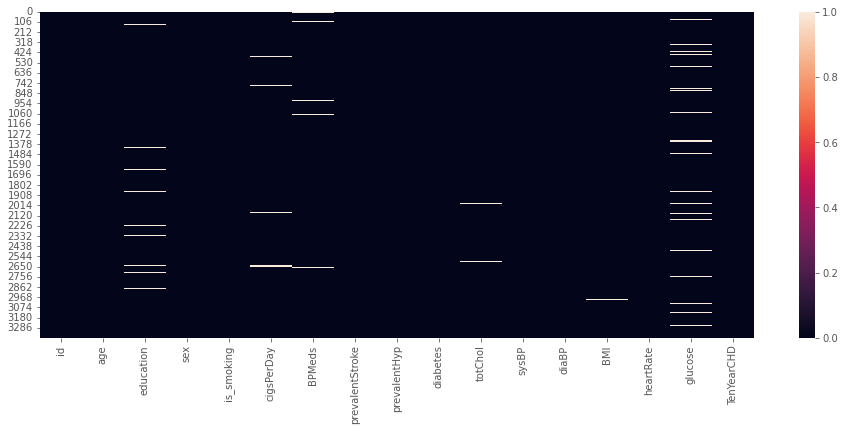

In [194]:
# PLotting missing and null values in a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(cvd_df.isnull())

Some insights:-
1. Null values are present in these rows:
*   education
*   cigsPerDay
*   BPMeds
*   totChol
*   BMI
*   heartRate
*   glucose



In [195]:
# Checking number of rows in which null values are present
count = 0
for i in cvd_df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  463


Explaination:-
* So, removing all null values will result in loss of almost 463 observations and we wil be left with almost 2927 columns.

In [196]:
# Percentage of null values in the respective columns
(cvd_df.isnull().sum()/cvd_df.shape[0]*100).sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

### *Dealing will null values*

Explaination:-
* As the data is missing and replacing it with mean, median or mode will make the dataset biased, and in case of medical data we cant take risk, so to avoid any such biasness in model learning we will delete those observations.We also havent got any prior request from the business regarding the handling of null values.

* We cant take risk as replacing such value may affect the number of false positives and false negatives.


In [197]:
cvd_df.shape

(3390, 17)

In [198]:
# Deleting null values observations
cvd_df.dropna(how = "any", inplace= True)

# Resetting index
cvd_df.reset_index(inplace = True, drop = True)

# Shape of the dataset now
cvd_df.shape



(2927, 17)

In [199]:
# Re-Check for null values in the new dataset
cvd_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Dropping unnecessary features

In [200]:
#Dropping 'id' feature
cvd_df.drop("id",axis=1,inplace=True) 

# #Dropping 'education' feature
# cvd_df.drop("education",axis=1,inplace=True) 


Explaination:-
*  Since ID has no effect on target variable so we will drop this column from our dataset.

* As there is no explaination of the column education from the business. we will first see, it it is higly correlated to our deoendent variable we might keep it.


## Encoding column SEX and IS_SMOKING

In [201]:
label_encoding = {'sex' : {'M': 0, 'F': 1}, 'is_smoking' : {'NO' : 0, 'YES' : 1}}

cvd_df = cvd_df.replace(label_encoding)

## Dividing into categorical and numerical features.

In [202]:
# Printing a table which tells the number of unique value in a column
counting= []
for column in cvd_df.columns:
  counting.append(cvd_df[column].nunique())
    
counts=pd.DataFrame({'columns' :cvd_df.columns, 
                    'Unique values' :[i for i in counting]
                      })
counts

,columns,Unique values
0,age,39
1,education,4
2,sex,2
3,is_smoking,2
4,cigsPerDay,31
5,BPMeds,2
6,prevalentStroke,2
7,prevalentHyp,2
8,diabetes,2
9,totChol,232


In [203]:
categorical_features= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

numerical_features= ['age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

independent_features= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

dependent_features=['TenYearCHD']

# **EDA**

In [204]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,1,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **UNIVARIATE ANALYSIS**

### Color Fucntions

In [205]:
def clr():
  colors=['green', 'blue', 'purple','red', 'orange', 'maroon', 'yellow', ]
  clr= random.choice(colors)
  return clr

def clr_pal():
   clr_pal=random.choice([ "bright", "dark", "colorblind","rocket", "icefire","Spectral","coolwarm", "Paired", "Set2"])
   return clr_pal

### 1. Histogram for all columns

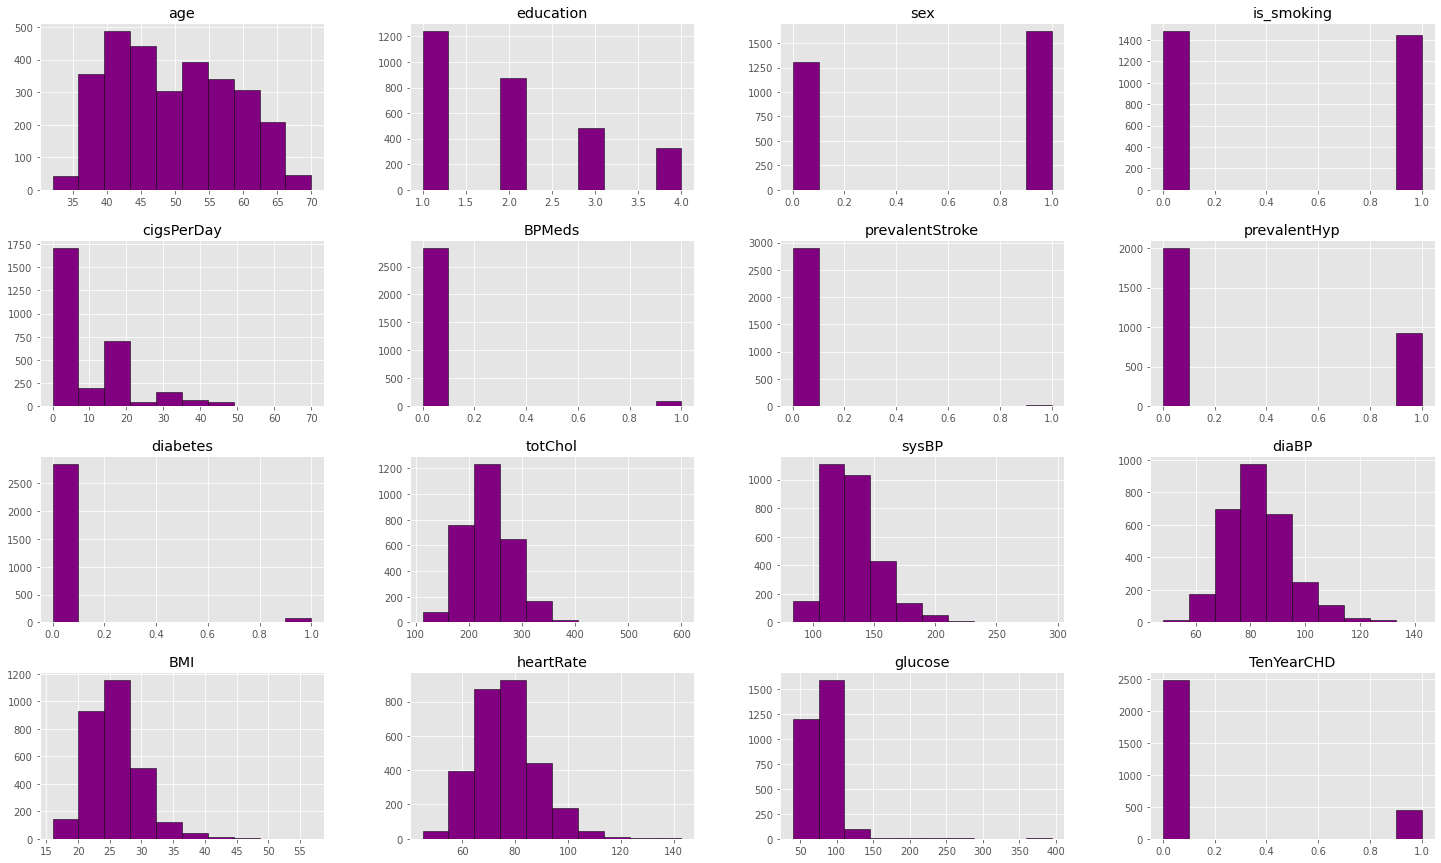

In [206]:
# it shows the value distribution in each columns


plt.style.use('ggplot')
cvd_df.hist(figsize=(25,15),color = clr(), ec="black")
plt.show()

### 2. Correlation heatmap

KeyboardInterrupt: ignored

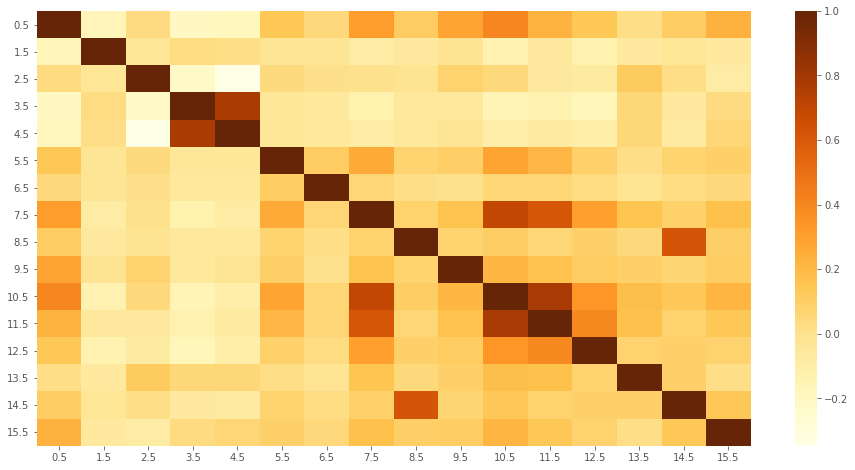

In [207]:
# Printing correlation heatmap
plt.figure(figsize = (16,8))
sns.heatmap(cvd_df.corr(),annot=True,cmap="YlOrBr")
plt.show()

Explaination:-
1. diabetes and glucose are higly correlated, as we know in diabetes the sugar/glucose in blood gets high as body do not produce insulin to break it and use as a energy source and so the sugar level rises in a person.
2. sysBP and diaBP are highly correlated to each other and prevalentHyp(hypertensive-high blodpressure problem) and BPmeds as hypertensive problem requires medications.
3. TenYearCHD is positively correlated to age, hprevalenthyp(hypertensive), totChol(cholestrol) and diabetes. so if a person has all these diseases and issues, he/she might be vulnurable of getting CHD.
4. BMI (body mass index) is also positively correlated to prevalentHyp. so as BMI increases prevalentHyp increases.
5. Education and cigsperday are negatively correlated to age, we can say people with high age, consume less cegrates per day and may have less education qualification.


We can say that ***TenYearCHD*** is positively correlated to these top 7 
features in Decending order.
1. Age....................................- (0.23)
3. sysBP.................................- (0.22)
3. prevalentHyp....................- (0.17)
4. diaBP.................................- (0.14)
5. glucose.............................- (0.13)
6. totchol...............................- (0.11)
7. diabetes.............................- (0.10)




### 3. Age distribution

In [ ]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'age', data=cvd_df , palette='husl')
ax.set_xlabel( 'age' , size = 15 )
ax.set_title( 'age data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have most of the data of age between 38 to 46 years old people.
* Minimum data is available of age 32 to 34 and from 68 to 70. 

### 4. Distribution of Sex

In [ ]:
# Distribution of sex
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cvd_df['sex'].value_counts().plot(kind='pie',colors= palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of Sex(Gender)', fontsize=20)

Explaination:-
* We have more data of females as compared to males.

### 5. Distribution of is_Smoking

In [ ]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'is_smoking', data=cvd_df , palette='bright')
ax.set_xlabel( 'is_smoking' , size = 15 )
ax.set_title( 'is_smoking data distribution' , size = 18 )

Explaination:-
* We have less smokes in out provided dataset.


### 7. Distribution of TenYearCHD

In [ ]:
# Distribution of TenYearCHD
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cvd_df['TenYearCHD'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

Explaination:-
* In our dataset the dependent variable, the onewe are going to predict is 15.2% of the total observations.

### 8. Distribution of Diabetes

In [ ]:
# Distribution of age
plt.figure(figsize = (16,8))
sns.countplot(x= 'diabetes', data=cvd_df , palette='husl')
plt.xlabel( 'Diabetes' , size = 15 )
plt.title( 'diabetes data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have very less diabetic patients in the dataset as compared to non-diabetic paitents.

### 9. Education data distribution

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
sns.countplot(x= 'education' , data=cvd_df , palette='dark')
ax.set_xlabel( 'education' , size = 15 )
ax.set_title( 'education data distribution' , size = 18 )

Explaination:-
* there are more level 1 education people in the record and as the education level increases till 4th level, the number of peope possessing  it are getting leniarly lesser.

## **Bivariate analysis**

In [ ]:


def visualizer(column, ticks_lst=[], table='yes'):
  
  if cvd_df[f'{column}'].nunique()<70:
    if table=='yes':
      print(pd.DataFrame(cvd_df.groupby('TenYearCHD')[column].value_counts().unstack(0).rename(columns ={0:'>----Not at Risk---->', 1: '>----At Risk---->'})))
    plt.figure(figsize=(16,8))
    ax = sns.countplot( x= f'{column}' , hue='TenYearCHD' ,data= cvd_df,  palette=(str(clr_pal())) )
    for i in ax.containers:
      ax.bar_label(i,)
    plt.title(f'The effect of column "{column.upper()}" on the target column TenYearCHD ',size=20)
    plt.legend(['No Risk','At Risk'])

    if len(ticks_lst) != 0:
      ax.set(xticklabels = (ticks_lst))

    plt.show()

### 1. TenYearCHD vs age

In [ ]:
visualizer('age', table='no')

### 2. TenYearCHD vs education

In [ ]:
visualizer('education')

### 3. TenYearCHD vs sex

In [ ]:
visualizer('sex',['Male','Female'])

### 4. TenYearCHD vs is_smoking

In [ ]:
visualizer('is_smoking',["Does'nt smokes", 'smokes'])

### 5. TenYearCHD vs cigsPerDay

In [ ]:
visualizer('cigsPerDay', table= 'no')

### 6. TenYearCHD vs BPMeds

In [ ]:
visualizer('BPMeds',["does'nt consume",'consumes'])


### 7. TenYearCHD vs prevalentstrokes

In [ ]:
visualizer('prevalentStroke',["Never got stroke",'got stroke'])


### 8. TenYearCHD vs prevalentHyp

In [ ]:
visualizer('prevalentHyp',["Not Hypertensive",'Hypertensive'])

### 9. Smokers vs non-smokers count with age

In [ ]:

plt.figure(figsize=(16,8))
ax= sns.countplot(x="age",hue="is_smoking",data=cvd_df, palette=(clr_pal()))
plt.legend(["Does'nt smokes",'Smokes'], loc=2)
for i in ax.containers:
      ax.bar_label(i)
plt.title('Smokers vs non-smokers count with age')


### 10. Prevalent Stroke count with age

In [ ]:

plt.figure(figsize=(16,8))
ax= sns.countplot(x="age",hue="prevalentHyp",data=cvd_df, palette= (clr_pal()))
plt.legend(["never got stroke",'got stroke'], loc=2)
plt.title('prevalentStroke count with age')
for i in ax.containers:
      ax.bar_label(i)

### 11. Average cholestrol level with age

In [ ]:
# Plotting the data
chol_eda= cvd_df.groupby('age').mean()['totChol'].reset_index()
plt.figure(figsize=(16,8))
sns.lineplot(x= 'age', y='totChol' , data= chol_eda, color= clr(), linewidth=5)
plt.title('Average cholestrol level vs age',fontsize=18)
plt.legend(['Cholestrol level'], loc=2)


### 12. Average glucose level of diabetic and non-doabetic person

In [ ]:
# Plotting the data
diab_eda= cvd_df.groupby('diabetes').mean()['glucose'].reset_index()
plt.figure(figsize=(16,8))
ax= sns.barplot(x= 'diabetes', y='glucose' , data= diab_eda, palette= (clr_pal()))
plt.title('Average glucose level of diabetic and non-doabetic person',fontsize=18)
ax.set(xticklabels = (['non-diabetic', 'diabetic']))
plt.show


## **Multivariate analysis**

### 1. Age vs other independent variables with comparision to TenYearCHD

In [ ]:
# age vs with other numerical values
for i in independent_features:
  if i!='age':
    ax= sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=cvd_df,legend=True , ci=None)
    ax.fig.set_size_inches(25,8)
    ax.fig.subplots_adjust(top=0.90,right=0.95)
    aa_ = ax.facet_axis(0, 0)
    for i in aa_.containers:
          labels = [f'{round(v.get_height(), 2)}' for v in i]
          aa_.bar_label(i, labels=labels, label_type='edge', padding=1)

- **The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.**

- **The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.**

- **If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR**

# **FEATURE ENGINEERING**

## 1. Hypothesis Testing



To check whether discrete variables are related, chi2 test can be used. We define:
1. **Null Hypothesis (H0): Two variables are independent.**
2. **Alternate Hypothesis (H1): Two variables are not independent.** 

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [208]:
# chi2 scores
chi_scores = chi2(cvd_df[categorical_features],cvd_df[dependent_features])
chi_scores

(array([ 6.00581652,  8.76259969,  1.64527101, 24.4846018 ,  7.87008359,
        57.41396234, 28.48354153]),
 array([1.42587939e-02, 3.07470462e-03, 1.99603796e-01, 7.49060905e-07,
        5.02593299e-03, 3.53091810e-14, 9.44983806e-08]))

In [209]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = cvd_df[categorical_features].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         1.996038e-01
education          1.425879e-02
prevalentStroke    5.025933e-03
sex                3.074705e-03
BPMeds             7.490609e-07
diabetes           9.449838e-08
prevalentHyp       3.530918e-14
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}, xlabel='P-value'>

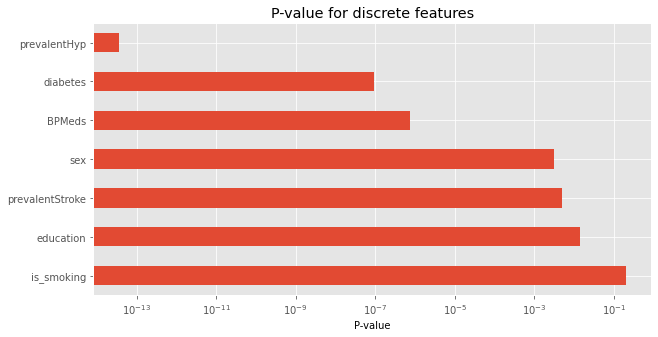

In [210]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* **Since prevalent hypertension column (prevalentHyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.**
* **The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).**
* **We can drop this column since we already have a column cigsPerDaywhich gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.**

## 2. Feature Removal

In [211]:
# Droping the column is_smoking
cvd_df = cvd_df.drop("is_smoking", axis=1)

# Removing this column from our features lists
categorical_features.remove('is_smoking')
independent_features.remove('is_smoking')


## 3. Checking for VIF

### Defining function

In [212]:
cvd_df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,1,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [213]:
# # Defining function to check VIF
def vif_calculator(name_):
   '''Calculates VIF'''
   vif_1 = pd.DataFrame()
   vif_1["variables"] = name_.columns
   vif = [variance_inflation_factor(name_.values, i) for i in range(0,name_.shape[1])]
   vif_1["VIF"] = vif
   vif_1.sort_values(by='VIF', ascending=False, inplace=True)
 
   return vif_1

### Checking VIF for all the independent variables

In [214]:
# Checking VIF for all Independent numeric columns
vif_calculator(cvd_df[[i for i in independent_features]])

,variables,VIF
9,sysBP,135.545705
10,diaBP,130.420566
11,BMI,43.930123
6,age,40.742029
12,heartRate,39.057415
8,totChol,31.771585
13,glucose,19.506982
0,education,4.648768
1,sex,2.697126
4,prevalentHyp,2.399691


Explaination:-
* As we are interested in classification, we do not need to get rid of collinear variables. These will influence our coefficients, but not the predictions. We can just leave them in.

## 5. Outlier and Anomaly Treatment

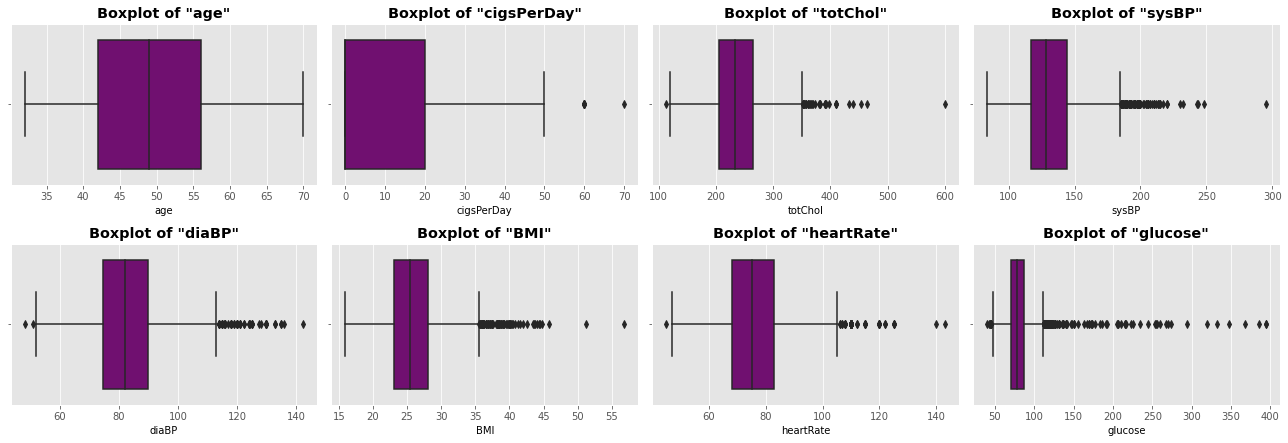

In [215]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cvd_df[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


Explaination:-
*  In some cases, outliers can represent meaningful data points and removing them may lead to loss of important information. For example, if an outlier in a medical dataset represents a rare disease, removing it could bias the model's predictions. so we are avoiding such removals.
* There are no such impossible values in our dataset, ex- 0 age, 0 glucose, 0 heartrate or values in minus in age. All these situatuions are error in data collection, 

In [216]:
# checking if our numerical features which cant have 0 value have it or not.

for col in ['age','sysBP','diaBP','BMI','heartRate','glucose']:
  zero_indices = cvd_df[cvd_df[col] ==0].index
  count= len(zero_indices)
  if count > 0:  
    print(f' "{col}" has {count} zero values in it and those are \n  {zero_indices}  \n' )
  else:
    print(f'No 0 values present in "{col}"')


No 0 values present in "age"
No 0 values present in "sysBP"
No 0 values present in "diaBP"
No 0 values present in "BMI"
No 0 values present in "heartRate"
No 0 values present in "glucose"


In [217]:
# Checking range of each column
ranges_=[]
for col in numerical_features:

  column_range = (cvd_df[col].min(), cvd_df[col].max())
  ranges_.append(column_range)

ranges_df=pd.DataFrame({'columns' :numerical_features, 
                      'Range' :[i for i in ranges_],
                      })
ranges_df

,columns,Range
0,age,"(32, 70)"
1,cigsPerDay,"(0.0, 70.0)"
2,totChol,"(113.0, 600.0)"
3,sysBP,"(83.5, 295.0)"
4,diaBP,"(48.0, 142.5)"
5,BMI,"(15.96, 56.8)"
6,heartRate,"(45.0, 143.0)"
7,glucose,"(40.0, 394.0)"


Explaination:-
* no 0 values in the columns.
* Range is fine no anomaly detected

## 4. Feature Encoding

In [218]:
# As previously we label encoded some columns tfor better EDA, now we are bringing it back to its original form.

label_encoding = {'sex' : {0 : 'M', 1 : 'F'}, 'is_smoking' : { 0 :'NO' , 1 : 'YES' }}

cvd_df = cvd_df.replace(label_encoding)

print(categorical_features)

['education', 'sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [219]:
# Using One-hot encoding on following columns in the list
# categorical_features.append('age')
# categorical_features.append('cigsPerDay')
# numerical_features.remove('age')
# numerical_features.remove('cigsPerDay')


def encoding(data, column):
    ''' this functions takes dataframe and column name/list to encode it(one-hot)'''
    
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data
  

for col in categorical_features:
    cvd_df = encoding(cvd_df, col)


cvd_df.head()



,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,...,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,...,0,1,1,0,1,0,0,1,1,0
1,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,...,0,1,1,0,1,0,0,1,1,0
3,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,...,1,0,1,0,1,0,1,0,1,0
4,61,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1,0,...,1,0,1,0,1,0,0,1,1,0


Explaination:-
*  I preffer one-Hot encoding as it creates new column, where in binary encoding we replace 2 values of column into 0 and 1. which may not be prefferable for all algorithms.

In [220]:
cvd_df = cvd_df.drop('TenYearCHD', axis=1).join(cvd_df['TenYearCHD'])

In [221]:
cvd_df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,...,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD
0,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,...,1,1,0,1,0,0,1,1,0,0
1,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,...,1,1,0,1,0,0,1,1,0,1
3,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,1,0,...,0,1,0,1,0,1,0,1,0,0
4,61,0.0,272.0,182.0,121.0,32.80,85.0,65.0,0,0,...,0,1,0,1,0,0,1,1,0,1


## 6. Class Imbalance handling


0    2483
1     444
Name: TenYearCHD, dtype: int64


Text(0.5, 1.0, 'Distribution of TenYearCHD')

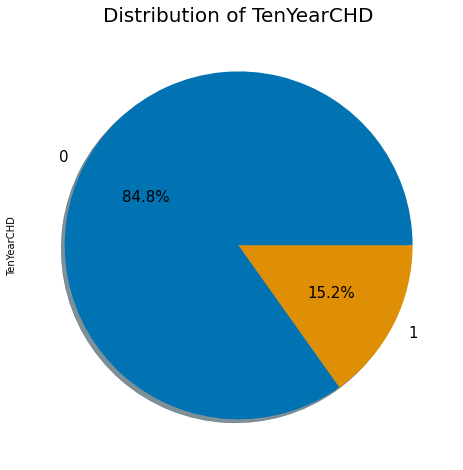

In [222]:
# Distribution of TenYearCHD
print(cvd_df['TenYearCHD'].value_counts())
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cvd_df['TenYearCHD'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

Explaination:-
*  We can see there is only 15% class 1 so we wil use smote to handle this class imbalance
* This technique generates synthetic data for the minority class.
* SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

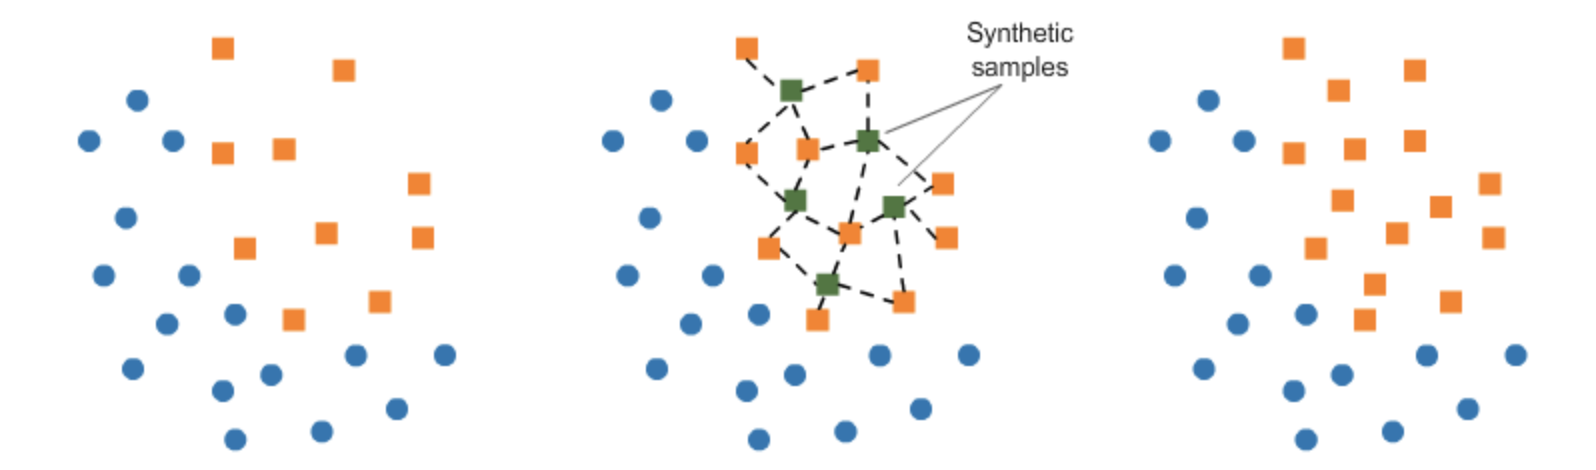

In [223]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(cvd_df.iloc[:,0:-1], cvd_df['TenYearCHD'])

print('Original dataset shape', len(cvd_df))
print('Resampled dataset shape', len(y_smote))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 2927
Resampled dataset shape 4966
Resampled dataset shape 4966


In [224]:
x_smote.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'education_1.0', 'education_2.0', 'education_3.0',
       'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0', 'BPMeds_1.0',
       'prevalentStroke_0', 'prevalentStroke_1', 'prevalentHyp_0',
       'prevalentHyp_1', 'diabetes_0', 'diabetes_1'],
      dtype='object')

In [225]:
# Merging both x and y dataframes together again
cvd_df = pd.concat([x_smote, y_smote], axis=1)
cvd_df.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'education_1.0', 'education_2.0', 'education_3.0',
       'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0', 'BPMeds_1.0',
       'prevalentStroke_0', 'prevalentStroke_1', 'prevalentHyp_0',
       'prevalentHyp_1', 'diabetes_0', 'diabetes_1', 'TenYearCHD'],
      dtype='object')

0    2483
1    2483
Name: TenYearCHD, dtype: int64


Text(0.5, 1.0, 'Distribution of TenYearCHD')

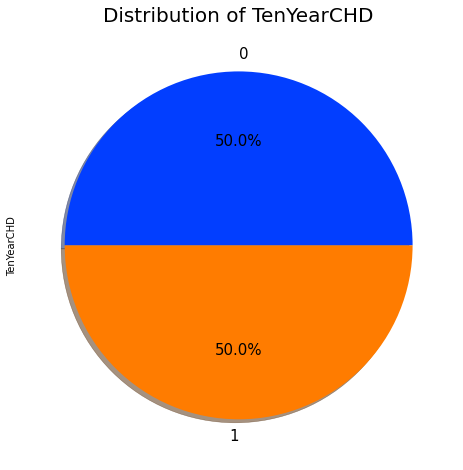

In [226]:
# Distribution of TenYearCHD checking again
print(cvd_df['TenYearCHD'].value_counts())
plt.figure(figsize=(16,8))
palette_color = sns.color_palette(clr_pal())
cvd_df['TenYearCHD'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

In [227]:
cvd_df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,...,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD
0,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,...,1,1,0,1,0,0,1,1,0,0
1,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,...,1,1,0,1,0,0,1,1,0,1
3,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,1,0,...,0,1,0,1,0,1,0,1,0,0
4,61,0.0,272.0,182.0,121.0,32.80,85.0,65.0,0,0,...,0,1,0,1,0,0,1,1,0,1


In [228]:
cvd_df.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'education_1.0', 'education_2.0', 'education_3.0',
       'education_4.0', 'sex_F', 'sex_M', 'BPMeds_0.0', 'BPMeds_1.0',
       'prevalentStroke_0', 'prevalentStroke_1', 'prevalentHyp_0',
       'prevalentHyp_1', 'diabetes_0', 'diabetes_1', 'TenYearCHD'],
      dtype='object')

## 7. Feature transformation

### Distribution check

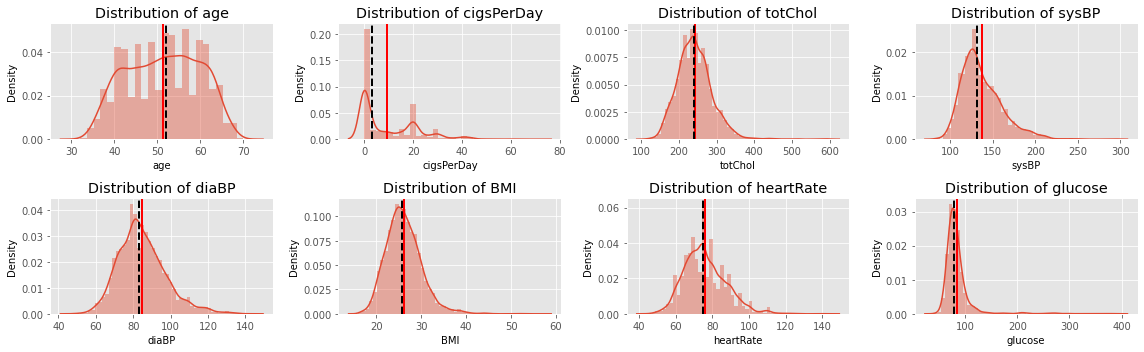

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [229]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cvd_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cvd_df[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cvd_df[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    
plt.show()

print(numerical_features)

### Skewness Check

In [230]:
# Calculate the skew value for each column
skew_values = cvd_df[numerical_features].skew()

# Print the skew values for each column
print(skew_values)

age          -0.064466
cigsPerDay    1.085682
totChol       1.017053
sysBP         1.134390
diaBP         0.684277
BMI           0.862261
heartRate     0.664819
glucose       5.447419
dtype: float64


Explaination:-
* Here in all the 8 numerical continous columns we have cigsPerDay and glucose most skewed.

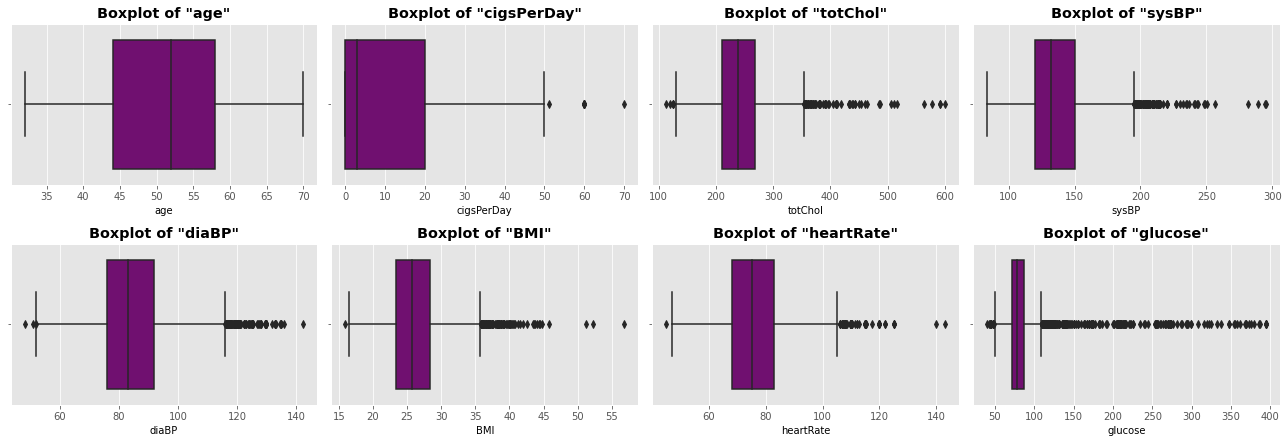

In [231]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cvd_df[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


### Transforming features

In [232]:

# def transformer():
# '''This function tzkes data and transforms the column with log or sqrt whichver is better'''


what_happened=[]
i=0
skew_values = cvd_df[numerical_features].skew()

for col in numerical_features:
  
  x1= (np.sqrt(cvd_df[col])).skew()
  x= abs((np.sqrt(cvd_df[col])).skew())
  y= np.log(cvd_df[col])
  y = y.replace(-np.inf, np.nan)
  y= y.fillna(0)
  y1= y.skew()
  y= abs(y.skew())

  


  if abs(skew_values[i])<x and abs(skew_values[i])< y:
    cvd_df[col]=cvd_df[col]
    show='No transformation'
    what_happened.append(show)
    

  elif x < y:
    cvd_df[col]=np.sqrt(cvd_df[col])
    show='Squareroot'
    what_happened.append(show)

  else:
    cvd_df[col]=np.log(cvd_df[col])
    cvd_df[col] = np.where(np.isinf(cvd_df[col]), 0, cvd_df[col])
    show='Log'
    what_happened.append(show)

  i=i+1
  
data_=pd.DataFrame({'columns' :numerical_features, 
                      'Transformation Type' :[i for i in what_happened],
                      'Old skew value' :[i for i in skew_values],
                      'New skew value' :[i for i in cvd_df[numerical_features].skew()]
                      })
data_


,columns,Transformation Type,Old skew value,New skew value
0,age,No transformation,-0.064466,-0.064466
1,cigsPerDay,Log,1.085682,0.082585
2,totChol,Log,1.017053,0.058722
3,sysBP,Log,1.134390,0.548262
4,diaBP,Log,0.684277,0.189805
5,BMI,Log,0.862261,0.224025
6,heartRate,Log,0.664819,0.178786
7,glucose,Log,5.447419,2.705745


### Range Check

In [233]:
# Checking range of each column
ranges_=[]
for col in numerical_features:

  column_range = (cvd_df[col].min(), cvd_df[col].max())
  ranges_.append(column_range)

ranges_df=pd.DataFrame({'columns' :numerical_features, 
                      'Range' :[i for i in ranges_],
                      })
ranges_df

,columns,Range
0,age,"(32, 70)"
1,cigsPerDay,"(-4.759189752379932, 4.248495242049359)"
2,totChol,"(4.727387818712341, 6.396929655216146)"
3,sysBP,"(4.42484663185681, 5.68697535633982)"
4,diaBP,"(3.871201010907891, 4.959341999708705)"
5,BMI,"(2.7700855920216627, 4.039536325727106)"
6,heartRate,"(3.8066624897703196, 4.962844630259907)"
7,glucose,"(3.6888794541139363, 5.976350909297934)"


### Distribution Check

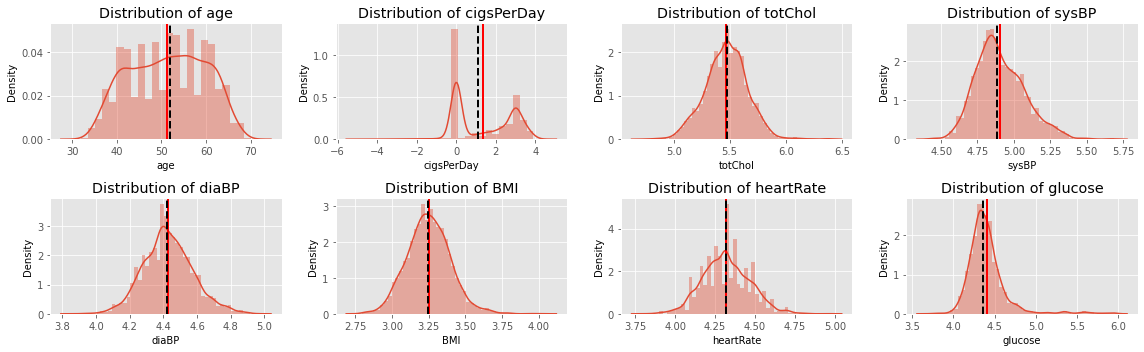

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [234]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cvd_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cvd_df[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cvd_df[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    
plt.show()

print(numerical_features)

## 8. Feature Scaling

In [235]:
# extract the features from the DataFrame
df_features = cvd_df[numerical_features]

# initialize the scaler
scaler = MinMaxScaler()

# fit the scaler to the extracted features
scaler.fit(df_features)

# transform the extracted features
df_features_scaled = pd.DataFrame(scaler.transform(df_features), columns=df_features.columns)

# merge the scaled features back into the original DataFrame
cvd_df = df_features_scaled.join(cvd_df.drop(numerical_features, axis=1))

In [236]:
cvd_df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,...,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD
0,0.105263,0.528348,0.376869,0.553919,0.655950,0.491091,0.406513,0.274805,0,0,...,1,1,0,1,0,0,1,1,0,0
1,0.368421,0.783972,0.475623,0.260468,0.359769,0.191418,0.580077,0.373520,1,0,...,0,1,0,1,0,1,0,1,0,0
2,0.473684,0.860923,0.433443,0.505296,0.557038,0.450086,0.357076,0.373520,1,0,...,1,1,0,1,0,0,1,1,0,1
3,0.842105,0.905936,0.453663,0.389404,0.525162,0.397050,0.382148,0.286310,1,0,...,0,1,0,1,0,1,0,1,0,0
4,0.763158,0.528348,0.526141,0.617338,0.849696,0.567445,0.550077,0.212247,0,0,...,0,1,0,1,0,0,1,1,0,1


<Axes: xlabel='cigsPerDay', ylabel='Density'>

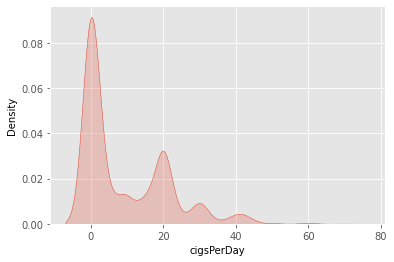

In [237]:
sns.kdeplot(df['cigsPerDay'], shade=True)

## Final check 

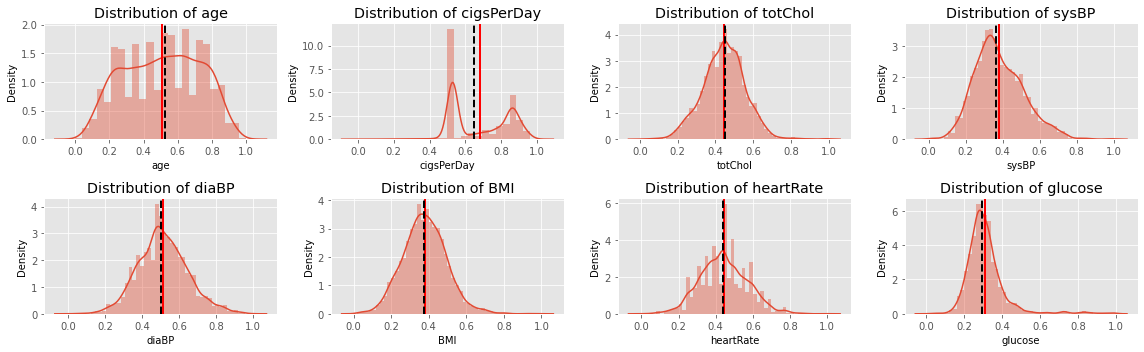

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [238]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cvd_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cvd_df[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cvd_df[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    
plt.show()

print(numerical_features)

# **MODEL IMPLEMENTATION**

## **Choice of prediction model:**



* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

## **Evaluation Metrics Selection**


In [239]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')



---


* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


---




\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

---    

## **Train Test Split**





* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of dependent variables in the train and test sets.

In [240]:
# Defining dependent and independent variables
X = cvd_df.drop('TenYearCHD',axis=1)
y = cvd_df[dependent_features]

In [241]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y, shuffle=True)

In [242]:
print("--------------------------------------------------")
print("shape of x_train is " ,x_train.shape)
print("--------------------------------------------------")
print("shape of y_train is " ,y_train.shape)
print("--------------------------------------------------")
print("Class distribution in y_train is \n",y_train.value_counts())
print("--------------------------------------------------")
print("Class distribution in y_test is \n",y_test.value_counts())
print("--------------------------------------------------")


--------------------------------------------------
shape of x_train is  (3724, 22)
--------------------------------------------------
shape of y_train is  (3724, 1)
--------------------------------------------------
Class distribution in y_train is 
 TenYearCHD
0             1862
1             1862
dtype: int64
--------------------------------------------------
Class distribution in y_test is 
 TenYearCHD
0             621
1             621
dtype: int64
--------------------------------------------------


## **Report Keeper Function**

In [297]:
# Defining my tables to keep report
test_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])
train_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

def reportkeeper(model_name, test_preds, train_preds):
#----------For Test Data-------------------------------------------------------------------------------------------
  cm=  confusion_matrix(y_test, test_preds)
  TN = cm[0][0] 
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  specificity = TN/(TN+FP)
  acc= accuracy_score(y_test, test_preds)
  roc=roc_auc_score(y_test, test_preds)
  prec = precision_score(y_test, test_preds)
  rec = recall_score(y_test, test_preds)
  f1 = f1_score(y_test, test_preds)

  new_row = {'Model':model_name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'Specificity': specificity , 'F1 Score': f1 ,'ROC': roc}
  test_report.loc[len(test_report)] = new_row

#----------For Train Data-------------------------------------------------------------------------------------------

  cm=  confusion_matrix(y_train, train_preds)
  TN = cm[0][0] 
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  specificity = TN/(TN+FP)
  acc= accuracy_score(y_train, train_preds)
  roc=roc_auc_score(y_train, train_preds)
  prec = precision_score(y_train, train_preds)
  rec = recall_score(y_train, train_preds)
  f1 = f1_score(y_train, train_preds)

  new_row = {'Model':model_name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'Specificity': specificity , 'F1 Score': f1 ,'ROC': roc}
  train_report.loc[len(train_report)] = new_row


## **Logistic Regression**

### 1. Model Training and Implementation

In [367]:
# create and train logistic regression model
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

### 2. Coefficients, Confusion Matrix and Reports

In [368]:
# Get the model coefficients
lr_model.coef_

array([[ 2.44983905,  1.61905498,  0.62341777,  1.75580494, -0.20201259,
         0.30866396, -0.38589619,  0.75725742, -4.01650655, -4.32927023,
        -4.57205411, -4.46631621, -4.1937596 , -3.87514935, -1.90321612,
        -2.02230815, -2.23062734, -0.97503487, -3.36020431, -3.29342891,
        -1.14515614, -0.91280699]])

In [369]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = lr_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = lr_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8646616541353384
The accuracy on test data is  0.8397745571658615


--------------------Train Report-----------------------

[[1808   54]
 [ 450 1412]]


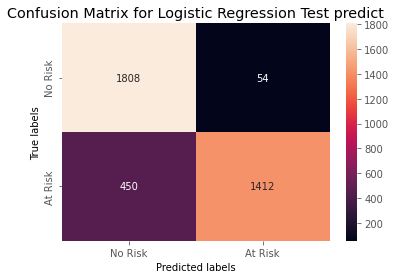

--------------------Test Report-----------------------

[[604  17]
 [182 439]]


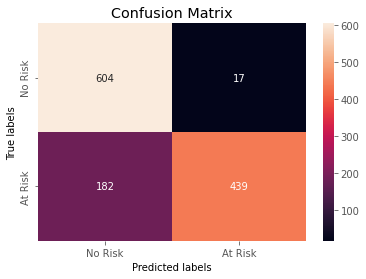

In [370]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [371]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Logistic Regression', test_preds= test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.8646616541353384
Accuracy score: 0.8646616541353384
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1862
           1       0.96      0.76      0.85      1862

    accuracy                           0.86      3724
   macro avg       0.88      0.86      0.86      3724
weighted avg       0.88      0.86      0.86      3724

--------------------Test Report-----------------------

ROCAUC score: 0.8397745571658615
Accuracy score: 0.8397745571658615
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       621
           1       0.96      0.71      0.82       621

    accuracy                           0.84      1242
   macro avg       0.87      0.84      0.84      1242
weighted avg       0.87      0.84      0.84      1242



### 3. Feature Importance

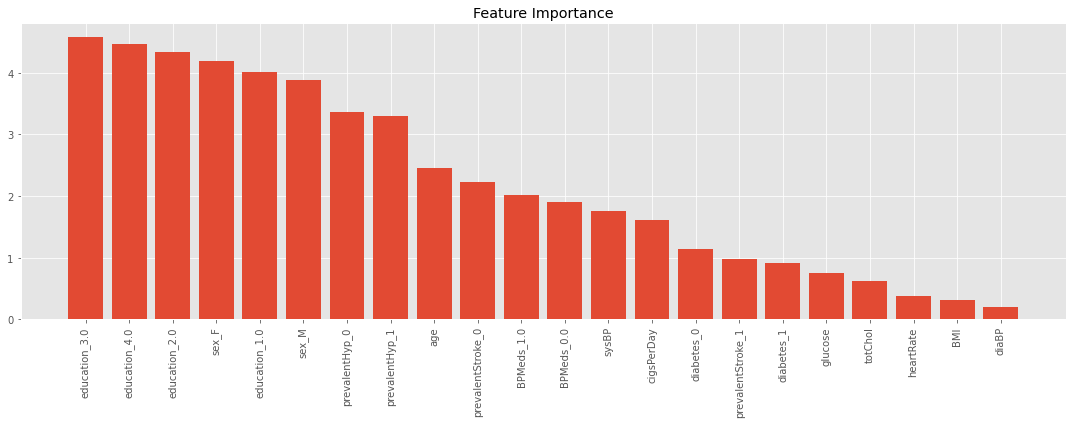

In [372]:
importance = np.abs(lr_model.coef_[0])

feature = x_train.columns
indices = np.argsort(importance)
indices = indices[::-1]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

## **K-Nearest Neighbour Classifier**

### 1. Checking how model accuracy changes with k

In [ ]:
# calculate accuracy score for first 50 neighbors
neighbors = 50

# Setup arrays to store training and test accuracies
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(x_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(x_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(x_test, y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,neighbors + 1)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

### 2. Model Training and Implementation

In [325]:
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

knn_best_params = knn_cv.best_params_

In [327]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'])

# training the model 
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### 3. Best Parameters, Confusion Matrix and Reports

In [ ]:
knn_best_params = knn_cv.best_params_
knn_best_params

In [302]:
print("Best accuracy on train ", knn_model.best_score_)
print("Best K for train ", knn_model.best_params_)

Best accuracy on train  0.8850739698347405
Best K for train  {'n_neighbors': 2}


In [303]:
# Get the accuracy scores for Train-----------------------------------------------------------
knn_train_predict = knn_model.predict(x_train)
train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Accuracy on Train ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
knn_test_predict = knn_model.predict(x_test)
train_accuracy = accuracy_score(knn_test_predict,y_test)
print("Accuracy on Test ", train_accuracy)

Accuracy on Train  0.9476369495166488
Accuracy on Test  0.8888888888888888


--------------------Train Report-----------------------

[[1862    0]
 [ 195 1667]]


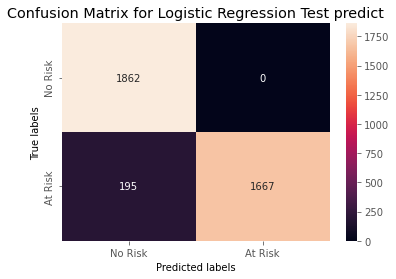

--------------------Test Report-----------------------

[[587  34]
 [104 517]]


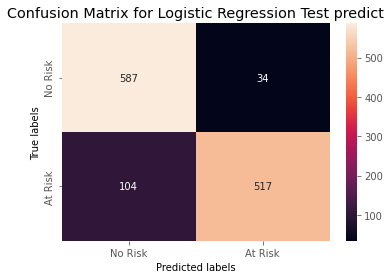

In [304]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, knn_train_predict)

print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, knn_test_predict)

print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [305]:

# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, knn_train_predict))
print('Accuracy score:', accuracy_score(y_train, knn_train_predict))
print(classification_report(y_train, knn_train_predict))

# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, knn_test_predict))
print('Accuracy score:', accuracy_score(y_test, knn_test_predict))
print(classification_report(y_test, knn_test_predict))

# Data uploading to Report keeper
reportkeeper(model_name= 'K-Nearest Neighbour', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.9476369495166488
Accuracy score: 0.9476369495166488
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1862
           1       1.00      0.90      0.94      1862

    accuracy                           0.95      3724
   macro avg       0.95      0.95      0.95      3724
weighted avg       0.95      0.95      0.95      3724

--------------------Test Report-----------------------

ROCAUC score: 0.888888888888889
Accuracy score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       621
           1       0.94      0.83      0.88       621

    accuracy                           0.89      1242
   macro avg       0.89      0.89      0.89      1242
weighted avg       0.89      0.89      0.89      1242



## **Naive Bayes Classifier**

### 1. Model Training and Implementation

In [392]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_params = {'var_smoothing': np.logspace(1,-9, num=100)
             }

nb_model = GaussianNB()
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=5,
                             scoring= 'recall')

nb_gridsearch.fit(x_train,y_train)
nb_best_params = nb_gridsearch.best_params_

In [393]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])
nb_model.fit(x_train,y_train)

GaussianNB(var_smoothing=10.0)

### 2. Best Model Parameters and Reports

In [308]:
nb_best_params = nb_gridsearch.best_params_
print(nb_best_params)

{'var_smoothing': 10.0}


In [309]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = nb_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = nb_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7475832438238453
The accuracy on test data is  0.748792270531401


--------------------Train Report-----------------------

[[1329  533]
 [ 407 1455]]


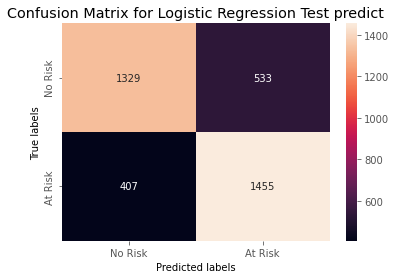

--------------------Test Report-----------------------

[[443 178]
 [134 487]]


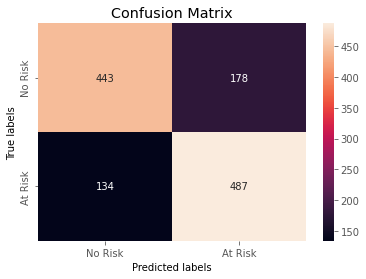

In [310]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [311]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Naive Bayes', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.7475832438238453
Accuracy score: 0.7475832438238453
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1862
           1       0.73      0.78      0.76      1862

    accuracy                           0.75      3724
   macro avg       0.75      0.75      0.75      3724
weighted avg       0.75      0.75      0.75      3724

--------------------Test Report-----------------------

ROCAUC score: 0.748792270531401
Accuracy score: 0.748792270531401
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       621
           1       0.73      0.78      0.76       621

    accuracy                           0.75      1242
   macro avg       0.75      0.75      0.75      1242
weighted avg       0.75      0.75      0.75      1242



## **Decision Tree Classifier**

### 1. Model Training and Implementation

In [312]:
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':[1,5,7,10,20,40,60],
             'min_samples_split':np.arange(0,1,0.1),
             'min_samples_leaf':np.arange(0,1,0.1)
             }

# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=5,
                             scoring= 'recall')

dt_gridsearch.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 7, 10, 20, 40, 60],
                         'min_samples_leaf': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'min_samples_split': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='recall')

In [313]:
dt_best_params = dt_gridsearch.best_params_

dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1)

### 2. Visualization of Decision Tree

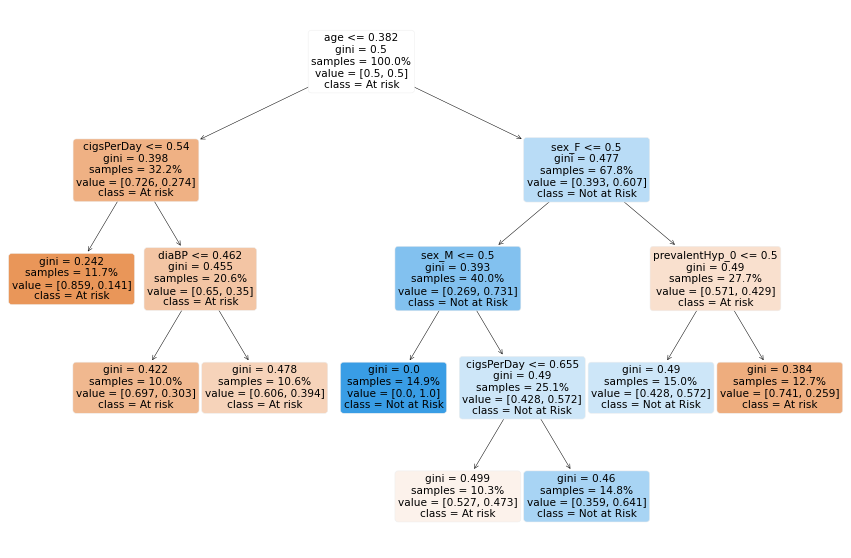

In [314]:
from sklearn.tree import plot_tree

features = cvd_df.columns
classes = ['At risk', 'Not at Risk']

plt.figure(figsize=(15, 10))
plot_tree(dt_model,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); 

### 3. Best Model Parameters and Reports

In [315]:
dt_best_params = dt_gridsearch.best_params_
dt_best_params

{'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [316]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = dt_gridsearch.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = dt_gridsearch.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7124060150375939
The accuracy on test data is  0.7069243156199678


--------------------Train Report-----------------------

[[1425  437]
 [ 634 1228]]


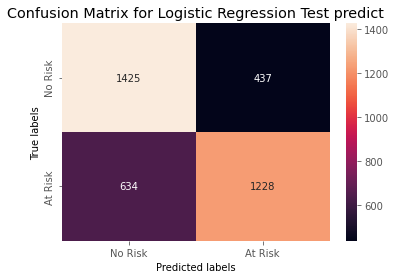

--------------------Test Report-----------------------

[[459 162]
 [202 419]]


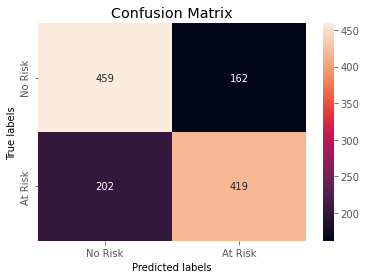

In [317]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [318]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Decision Tree', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.7124060150375939
Accuracy score: 0.7124060150375939
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1862
           1       0.74      0.66      0.70      1862

    accuracy                           0.71      3724
   macro avg       0.71      0.71      0.71      3724
weighted avg       0.71      0.71      0.71      3724

--------------------Test Report-----------------------

ROCAUC score: 0.7069243156199677
Accuracy score: 0.7069243156199678
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       621
           1       0.72      0.67      0.70       621

    accuracy                           0.71      1242
   macro avg       0.71      0.71      0.71      1242
weighted avg       0.71      0.71      0.71      1242



### 4. Feature Importance

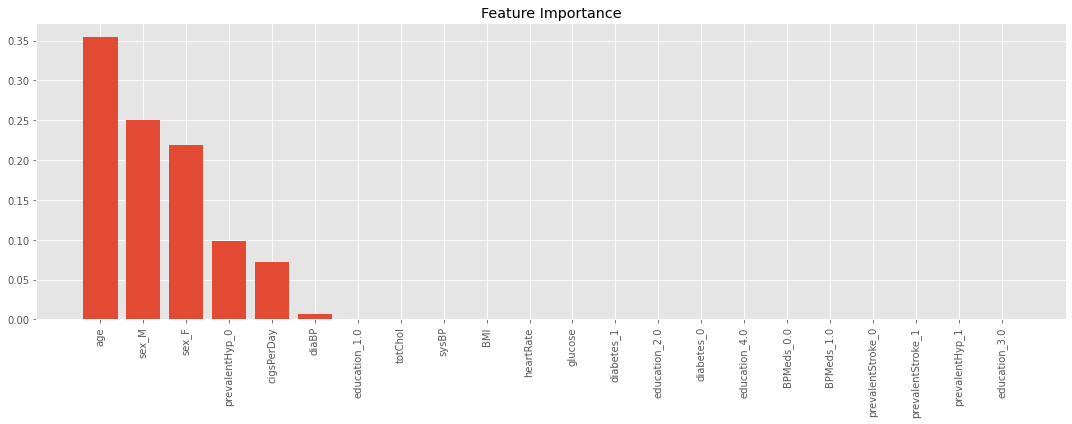

In [319]:
# Feature Importance
importance = dt_model.feature_importances_
feature = x_train.columns
indices = np.argsort(importance)
indices = indices[::-1]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## **Random Forest Classifier**

### 1. Model Training and Implementation

In [323]:
# Random forest model
rf_model = RandomForestClassifier()

# Using gridsearchcv to find best parameters
rf_params = {'n_estimators':[500],                   
             'max_depth':np.arange(1,6),
             'min_samples_split':[.1,.2],
             'min_samples_leaf':np.arange(0.1, 0.6, 0.1)}

rf_gridsearch = GridSearchCV(rf_model,
                             rf_params,
                             cv=5,
                             scoring='recall')

rf_gridsearch.fit(x_train,y_train)

rf_best_params = rf_gridsearch.best_params_

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(criterion="entropy",
                                  n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)
rf_model.fit(x_train,y_train)

### 2. Best Model Parameters and Reports

In [ ]:
dt_best_params = rf_gridsearch.best_params_
dt_best_params

In [ ]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = rf_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = rf_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Random Forest', test_preds=test_preds, train_preds= train_preds)

### 3. Feature Importance

In [ ]:
# Feature Importance
importance = rf_model.feature_importances_
feature = x_train.columns
indices = np.argsort(importance)
indices = indices[::-1]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## **Support Vector Classifier**


### 1. Model Training and Implementation

In [383]:
# SVM model parameters
from sklearn.svm import SVC
svm_model = SVC(random_state=0)
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
             }

# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=5,
                              scoring= 'recall')

svm_gridsearch.fit(x_train,y_train)
svm_best_params = svm_gridsearch.best_params_

KeyboardInterrupt: ignored

In [390]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel'],
                probability= True)

# training the model 
svm_model.fit(x_train,y_train)

SVC(C=10, gamma=0.01, probability=True)

### 2. Best Model Parameters and Reports

In [376]:
# Best parameters 
svm_best_params = svm_gridsearch.best_params_
print(svm_best_params)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [377]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = svm_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = svm_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8619763694951665
The accuracy on test data is  0.8285024154589372


--------------------Train Report-----------------------

[[1856    6]
 [ 508 1354]]


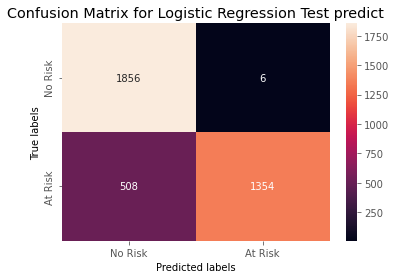

--------------------Test Report-----------------------

[[616   5]
 [208 413]]


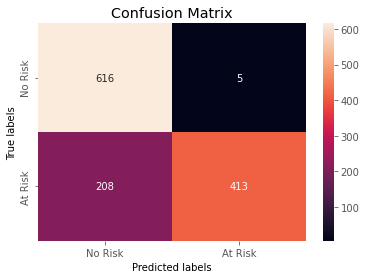

In [378]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [379]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Support Vector Classifier', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.8619763694951665
Accuracy score: 0.8619763694951665
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1862
           1       1.00      0.73      0.84      1862

    accuracy                           0.86      3724
   macro avg       0.89      0.86      0.86      3724
weighted avg       0.89      0.86      0.86      3724

--------------------Test Report-----------------------

ROCAUC score: 0.8285024154589371
Accuracy score: 0.8285024154589372
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       621
           1       0.99      0.67      0.79       621

    accuracy                           0.83      1242
   macro avg       0.87      0.83      0.82      1242
weighted avg       0.87      0.83      0.82      1242



## **XG Boost Classifier**

### 1. Model Training and Implementation

In [349]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500], 
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

# Using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,
                              xgb_params,
                              cv=5,
                              scoring='recall')

xgb_gridsearch.fit(x_train,y_train)

xgb_best_params = xgb_gridsearch.best_params_

In [350]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)
xgb_model.fit(x_train,y_train)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

### 2. Best Model Parameters and Reports

In [351]:
xgb_best_params = xgb_gridsearch.best_params_
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [352]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = xgb_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = xgb_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8571428571428571
The accuracy on test data is  0.8429951690821256


--------------------Train Report-----------------------

[[1764   98]
 [ 434 1428]]


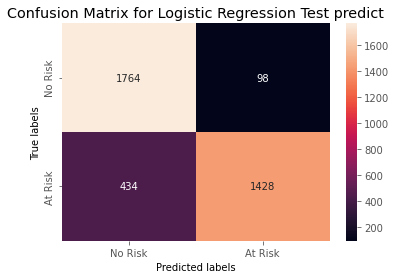

--------------------Test Report-----------------------

[[589  32]
 [163 458]]


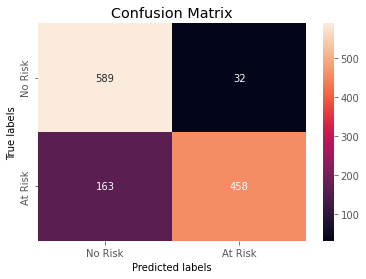

In [353]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [354]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'XG Boost', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 0.8571428571428571
Accuracy score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1862
           1       0.94      0.77      0.84      1862

    accuracy                           0.86      3724
   macro avg       0.87      0.86      0.86      3724
weighted avg       0.87      0.86      0.86      3724

--------------------Test Report-----------------------

ROCAUC score: 0.8429951690821256
Accuracy score: 0.8429951690821256
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       621
           1       0.93      0.74      0.82       621

    accuracy                           0.84      1242
   macro avg       0.86      0.84      0.84      1242
weighted avg       0.86      0.84      0.84      1242



### 3. Feature Importance

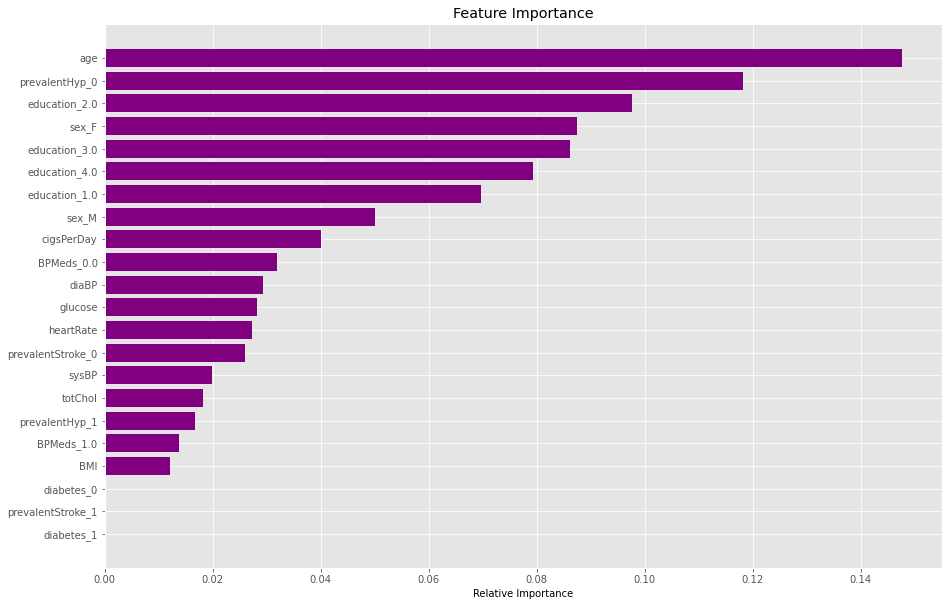

In [355]:
# finding best estimator
optimal_xgb=xgb_gridsearch.best_estimator_

#shows the graph of feature importance
features = x_train.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Gradient Boost Classifier**

### 1. Model Training and Implementation

In [331]:
# Gradient boosting algorithm
gb_model = GradientBoostingClassifier()

# using gridsearchcv to find best parameters
params = {'n_estimators':[185,190,195],'max_depth':[11,12,13]}

# Grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(x_train,y_train)

gb_best_params = gb_grid.best_params_

In [332]:
# Fitting xgb with best parameters
gb_model = GradientBoostingClassifier(n_estimators=gb_best_params['n_estimators'],
                                      max_depth=gb_best_params['max_depth'],
                                      random_state=0)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=11, n_estimators=190, random_state=0)

### 2. Best Model Parameters and Reports

In [343]:
gb_best_params = gb_grid.best_params_
gb_best_params

{'max_depth': 11, 'n_estimators': 190}

In [344]:
# Get the accuracy scores for Train-----------------------------------------------------------
train_preds = gb_model.predict(x_train)
train_accuracy = accuracy_score(train_preds,y_train)
print("The accuracy on train data is ", train_accuracy)

# Get the accuracy scores for Test-----------------------------------------------------------
test_preds = gb_model.predict(x_test)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.8977455716586151


--------------------Train Report-----------------------

[[1862    0]
 [   0 1862]]


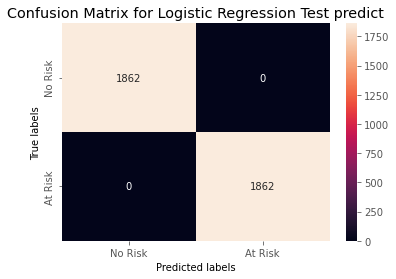

--------------------Test Report-----------------------

[[590  31]
 [ 96 525]]


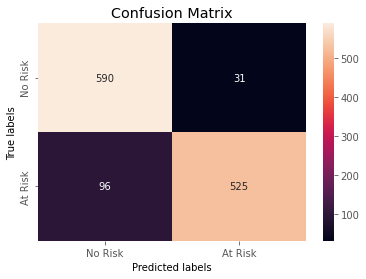

In [345]:
# Get the confusion matrix for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Get the confusion matrix for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [346]:
# Print the classification report for train-----------------------------------------------------------
print("--------------------Train Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_train, train_preds))
print('Accuracy score:', accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds))


# Print the classification report for test-----------------------------------------------------------
print("--------------------Test Report-----------------------\n")
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

# Data uploading to Report keeper
reportkeeper(model_name= 'Gradient Boost', test_preds=test_preds, train_preds= train_preds)

--------------------Train Report-----------------------

ROCAUC score: 1.0
Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1862
           1       1.00      1.00      1.00      1862

    accuracy                           1.00      3724
   macro avg       1.00      1.00      1.00      3724
weighted avg       1.00      1.00      1.00      3724

--------------------Test Report-----------------------

ROCAUC score: 0.8977455716586151
Accuracy score: 0.8977455716586151
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       621
           1       0.94      0.85      0.89       621

    accuracy                           0.90      1242
   macro avg       0.90      0.90      0.90      1242
weighted avg       0.90      0.90      0.90      1242



### 3. Feature Importance

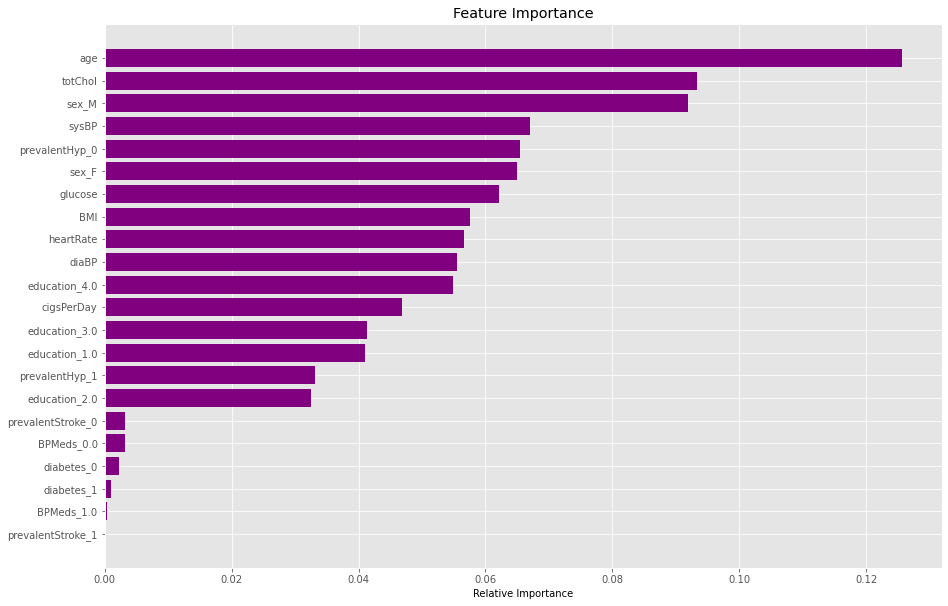

In [348]:
# finding best estimator
optimal_gb=gb_grid.best_estimator_

#shows the graph of feature importance
features = x_train.columns
importances = optimal_gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **MODEL EVALUATION**

## Train Data Report

In [396]:
cm = sns.light_palette("xkcd:copper", as_cmap=True)
train_report.style.background_gradient(cmap=cm).set_precision(2)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.86,0.96,0.76,0.97,0.85,0.86
1,K-Nearest Neighbour,0.86,0.96,0.76,0.97,0.85,0.86
2,Naive Bayes,0.75,0.73,0.78,0.71,0.76,0.75
3,Decision Tree,0.71,0.74,0.66,0.77,0.70,0.71
4,Support Vector Classifier,0.86,1.00,0.73,1.00,0.84,0.86
5,Gradient Boost,1.00,1.00,1.00,1.00,1.00,1.00
6,Gradient Boost,1.00,1.00,1.00,1.00,1.00,1.00
7,XG Boost,0.86,0.94,0.77,0.95,0.84,0.86
8,Logistic Regression,0.86,0.96,0.76,0.97,0.85,0.86
9,Support Vector Classifier,0.86,1.00,0.73,1.00,0.84,0.86


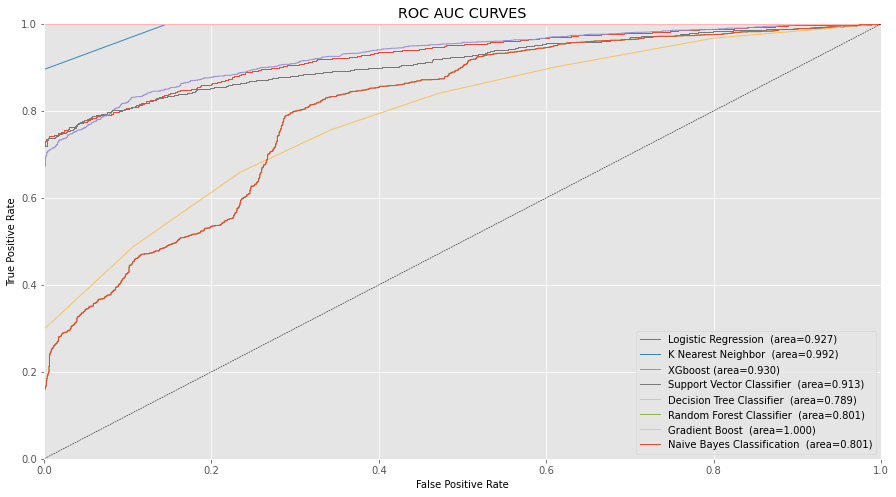

In [397]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(15,8))


roc_auc_plot(y_train,lr_model.predict_proba(x_train),label='Logistic Regression ',l='-')
roc_auc_plot(y_train,knn_model.predict_proba(x_train),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_train,xgb_model.predict_proba(x_train),label='XGboost',l='-')
roc_auc_plot(y_train,svm_model.predict_proba(x_train),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_train,dt_model.predict_proba(x_train),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_train,nb_model.predict_proba(x_train),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_train,gb_model.predict_proba(x_train),label='Gradient Boost ',l='-')
roc_auc_plot(y_train,nb_model.predict_proba(x_train),label='Naive Bayes Classification ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

## **Test Data Report**

In [398]:
cm = sns.light_palette("xkcd:copper", as_cmap=True)
test_report.style.background_gradient(cmap=cm).set_precision(2)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.84,0.96,0.71,0.97,0.82,0.84
1,K-Nearest Neighbour,0.84,0.96,0.71,0.97,0.82,0.84
2,Naive Bayes,0.75,0.73,0.78,0.71,0.76,0.75
3,Decision Tree,0.71,0.72,0.67,0.74,0.70,0.71
4,Support Vector Classifier,0.83,0.99,0.67,0.99,0.79,0.83
5,Gradient Boost,0.90,0.94,0.85,0.95,0.89,0.90
6,Gradient Boost,0.90,0.94,0.85,0.95,0.89,0.90
7,XG Boost,0.84,0.93,0.74,0.95,0.82,0.84
8,Logistic Regression,0.84,0.96,0.71,0.97,0.82,0.84
9,Support Vector Classifier,0.83,0.99,0.67,0.99,0.79,0.83


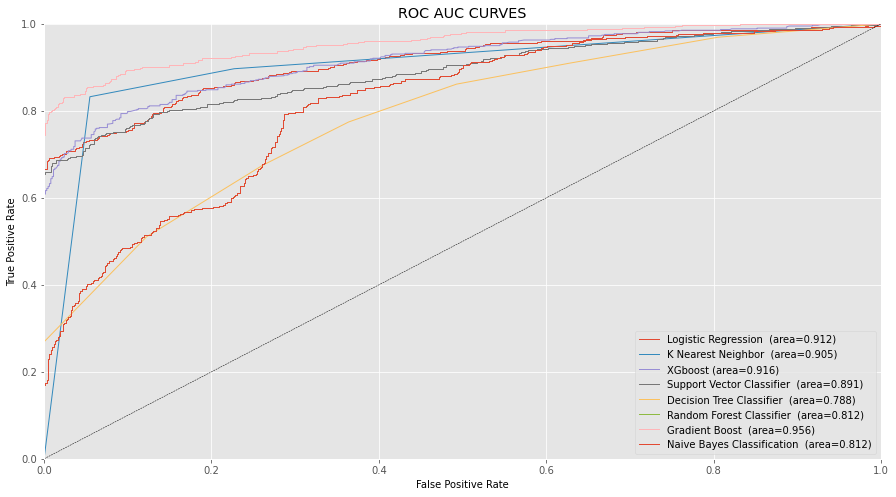

In [399]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(15,8))


roc_auc_plot(y_test,lr_model.predict_proba(x_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn_model.predict_proba(x_test),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(x_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_model.predict_proba(x_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,dt_model.predict_proba(x_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,nb_model.predict_proba(x_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,gb_model.predict_proba(x_test),label='Gradient Boost ',l='-')
roc_auc_plot(y_test,nb_model.predict_proba(x_test),label='Naive Bayes Classification ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

In [400]:
train_report

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.864662,0.963165,0.758324,0.970999,0.848558,0.864662
1,K-Nearest Neighbour,0.864662,0.963165,0.758324,0.970999,0.848558,0.864662
2,Naive Bayes,0.747583,0.731891,0.781418,0.713749,0.755844,0.747583
3,Decision Tree,0.712406,0.737538,0.659506,0.765306,0.696343,0.712406
4,Support Vector Classifier,0.861976,0.995588,0.727175,0.996778,0.840472,0.861976
5,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,XG Boost,0.857143,0.935780,0.766917,0.947368,0.842975,0.857143
8,Logistic Regression,0.864662,0.963165,0.758324,0.970999,0.848558,0.864662
9,Support Vector Classifier,0.861976,0.995588,0.727175,0.996778,0.840472,0.861976


In [401]:
test_report

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.839775,0.962719,0.706924,0.972625,0.815227,0.839775
1,K-Nearest Neighbour,0.839775,0.962719,0.706924,0.972625,0.815227,0.839775
2,Naive Bayes,0.748792,0.732331,0.784219,0.713366,0.757387,0.748792
3,Decision Tree,0.706924,0.721170,0.674718,0.739130,0.697171,0.706924
4,Support Vector Classifier,0.828502,0.988038,0.665056,0.991948,0.794995,0.828502
5,Gradient Boost,0.897746,0.944245,0.845411,0.950081,0.892099,0.897746
6,Gradient Boost,0.897746,0.944245,0.845411,0.950081,0.892099,0.897746
7,XG Boost,0.842995,0.934694,0.737520,0.948470,0.824482,0.842995
8,Logistic Regression,0.839775,0.962719,0.706924,0.972625,0.815227,0.839775
9,Support Vector Classifier,0.828502,0.988038,0.665056,0.991948,0.794995,0.828502


# **CONCLUSION**

1. According to **Decision Tree and Random forest model**, **age** is the most important feature but according to **gradient boost and XG boost model**, most important features are **heart rate and sex respectively**.
2. **Gradient boost model is the most accurate model** among  all the models, on the basis of evaluation parameters such as  **Accuracy (91%), Precision (91%), Specificity (93%), F1 score (89%), and AUC-ROC score (90%)**.
3. **KNN model** is the best model on the basis of **Recall (92%)**.
4. **Logistic Regression model** has the least **Accuracy (69%)**.